# Árvores de decisão e Floresta aleatórias

[https://archive.ics.uci.edu/ml/datasets/mushroom](https://archive.ics.uci.edu/ml/datasets/mushroom)

### Bibliotecas e Carregamento

In [36]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('../datasets/mushrooms.csv')

In [38]:
figsize=(12, 6)

head, shape, info

In [39]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
df.shape

(8124, 23)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Descrição dos dados

In [42]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Dados faltantes

In [43]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Converter colunas

In [44]:
for c in df.columns:
    df[c] = df[c].astype('category').cat.codes
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Gráficos

Pairplot das primeiras colunas, hue='class'

<Figure size 864x432 with 0 Axes>

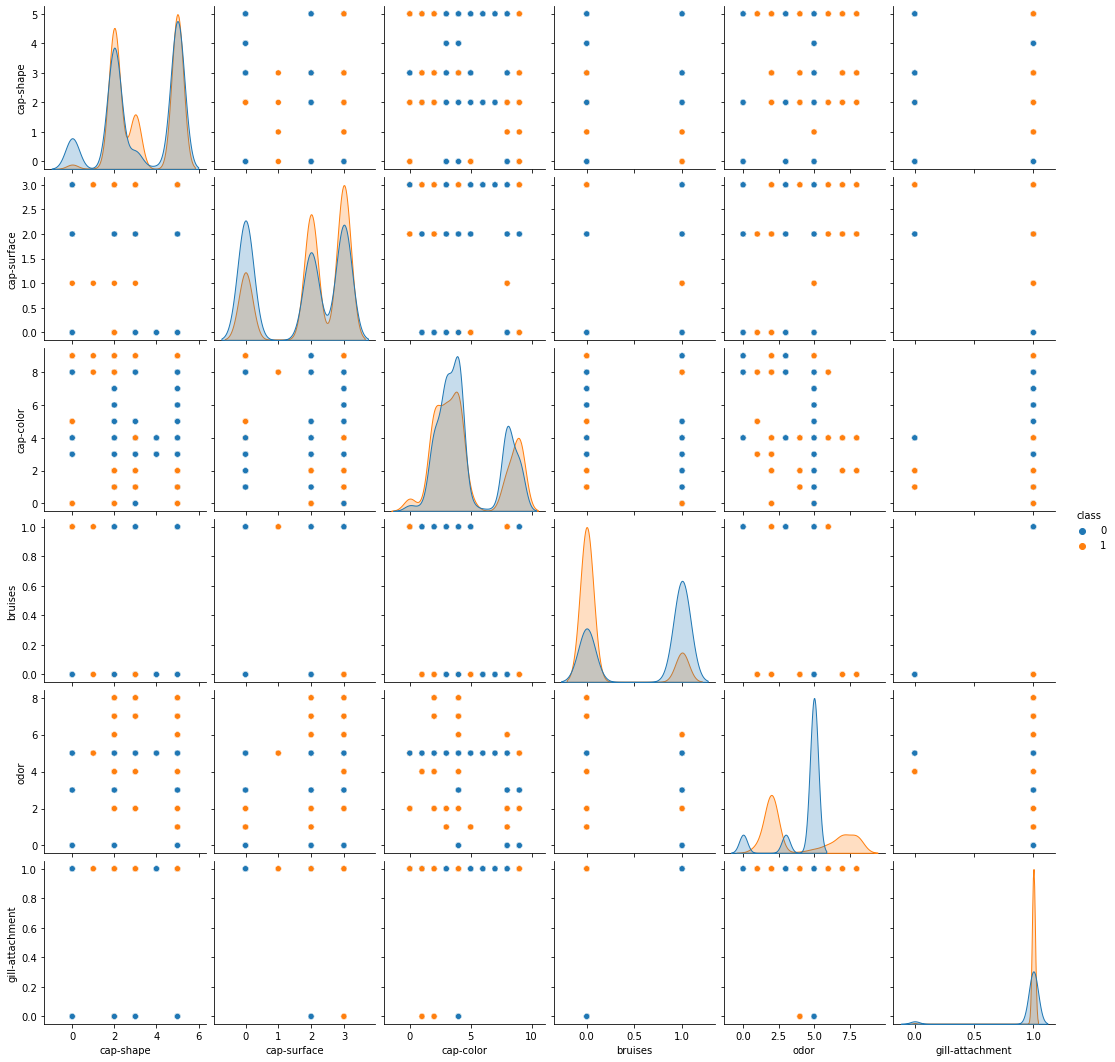

In [55]:
plt.figure(figsize=figsize)
sns.pairplot(df[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment']], hue='class')

Correlação com heatmap

<AxesSubplot:>

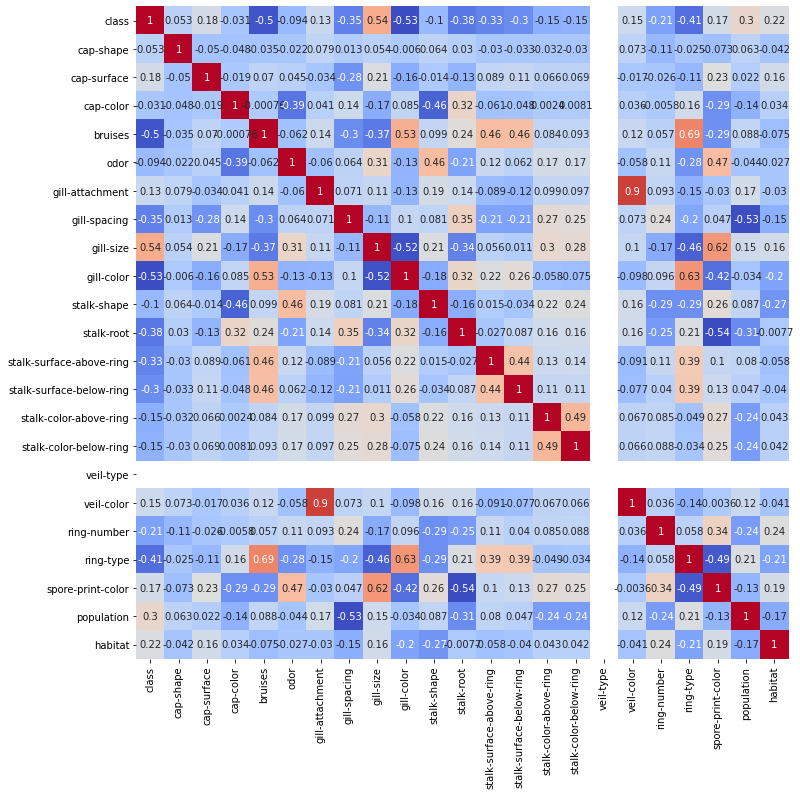

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), square = True, annot=True, cbar=False, cmap= 'coolwarm')

Value counts de `veil-color`

In [46]:
df['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

Scatter color x gill-collor, Hue Type

<AxesSubplot:xlabel='cap-color', ylabel='odor'>

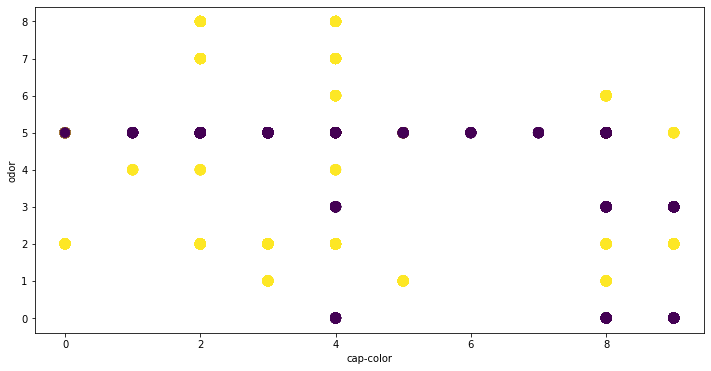

In [69]:
df.plot.scatter(x='cap-color', y='odor', figsize=figsize, s=100, c='class', cmap='viridis', colorbar=False)

Jointplot `population` x `gill-spacing`

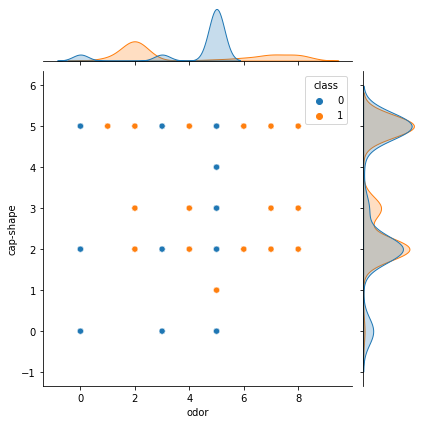

In [72]:
sns.jointplot(data=df, x='odor', y='cap-shape', hue='class')

Remover coluna `veil-type`

In [74]:
df.drop(['veil-type'], inplace=True, axis=1)

### Split dos dados

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [77]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']]
y = df['class']

In [128]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.9, random_state=1)

### Criando um modelo

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [130]:
clf = DecisionTreeClassifier()

In [131]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Predição

In [132]:
y_hat = clf.predict(X_test)

### Qualidade do modelo
```py
from sklearn.metrics import classification_report, accuracy_score
```

In [133]:
from sklearn.metrics import classification_report, accuracy_score

In [134]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3791
           1       1.00      1.00      1.00      3521

    accuracy                           1.00      7312
   macro avg       1.00      1.00      1.00      7312
weighted avg       1.00      1.00      1.00      7312



Plot tree

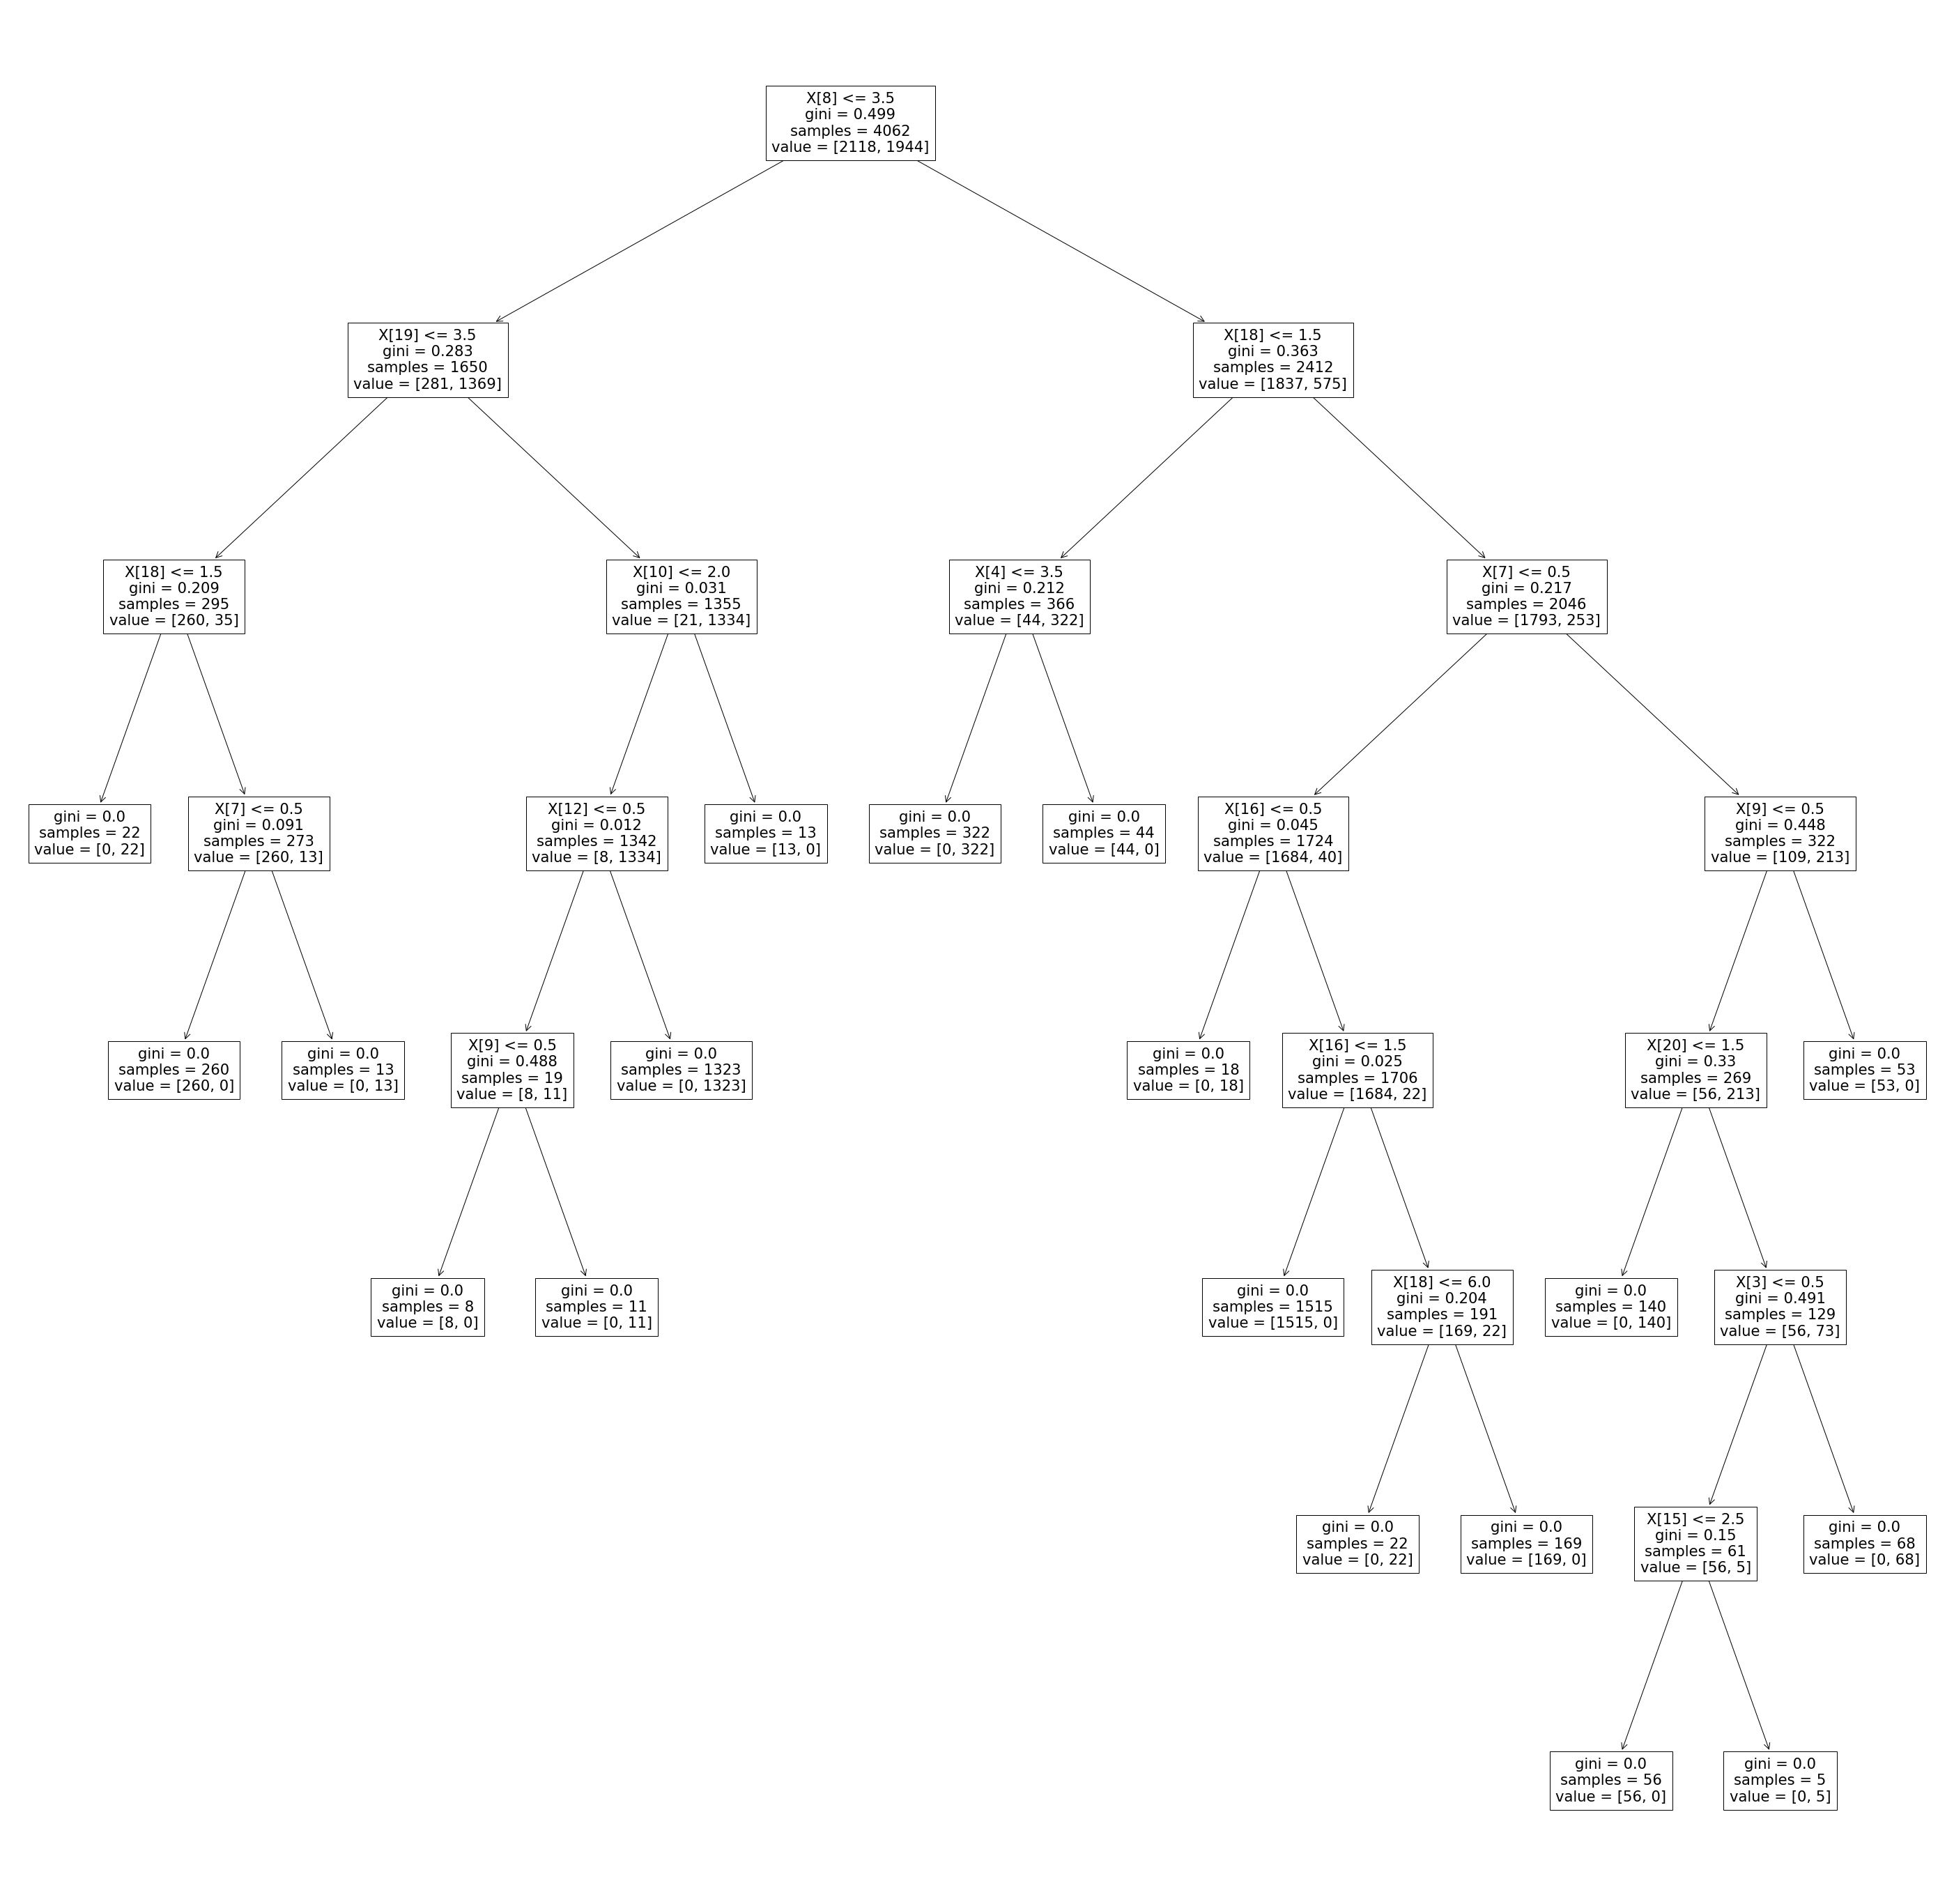

In [112]:
plt.figure(figsize=(50,50))
_= plot_tree(clf)

In [113]:
gv = export_graphviz(clf)

for i, c in enumerate(X.columns):
    gv = gv.replace(f'X[{i+1}]', c)
    
print(gv)

digraph Tree {
node [shape=box] ;
0 [label="gill-size <= 3.5\ngini = 0.499\nsamples = 4062\nvalue = [2118, 1944]"] ;
1 [label="spore-print-color <= 3.5\ngini = 0.283\nsamples = 1650\nvalue = [281, 1369]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ring-type <= 1.5\ngini = 0.209\nsamples = 295\nvalue = [260, 35]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 22\nvalue = [0, 22]"] ;
2 -> 3 ;
4 [label="gill-spacing <= 0.5\ngini = 0.091\nsamples = 273\nvalue = [260, 13]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 260\nvalue = [260, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
4 -> 6 ;
7 [label="stalk-shape <= 2.0\ngini = 0.031\nsamples = 1355\nvalue = [21, 1334]"] ;
1 -> 7 ;
8 [label="stalk-surface-above-ring <= 0.5\ngini = 0.012\nsamples = 1342\nvalue = [8, 1334]"] ;
7 -> 8 ;
9 [label="gill-color <= 0.5\ngini = 0.488\nsamples = 19\nvalue = [8, 11]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
9 -> 10 ;
11 [labe

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2090
           1       1.00      1.00      1.00      1972

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

